# 第3章 2つの変数の記述統計

相関(量的変数同士の関係)や連関(質的変数同士の関係)について

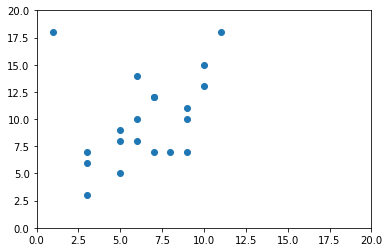

In [20]:
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt

stat_test1 = np.array([6,10,6,10,5,3,5,9,3,3,11,6,1,9,7,5,8,7,7,9])
stat_test2 = np.array([10,13,8,15,8,6,9,10,7,3,18,14,18,11,12,5,7,12,7,7])
psych_test = np.array([13, 14, 7, 12, 10, 6, 8, 15, 4, 14, 9, 6, 10, 12, 5, 12, 8, 8, 12, 15])

# https://pythondatascience.plavox.info/matplotlib/%E6%95%A3%E5%B8%83%E5%9B%B3
plt.scatter(stat_test1, stat_test2)
# 他の図とスケールを合わせる為にx,y軸の最小最大値を指定しておく
plt.ylim(0, 20)
plt.xlim(0, 20)
plt.show()

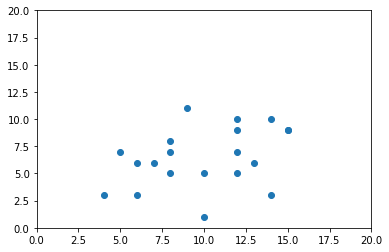

In [16]:
plt.scatter(psych_test, stat_test1)
plt.ylim(0, 20)
plt.xlim(0, 20)
plt.show()

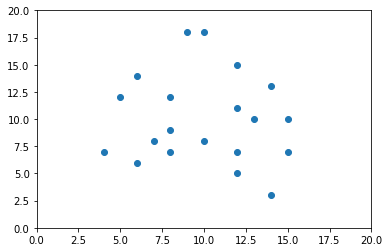

In [17]:
plt.scatter(psych_test, stat_test2)
plt.ylim(0, 20)
plt.xlim(0, 20)
plt.show()

In [72]:
# 共分散
# https://docs.python.jp/3/library/statistics.html
cov12 = np.mean((stat_test1 - np.mean(stat_test1)) * (stat_test2 - np.mean(stat_test2)))
print(cov12)

# 不偏共分散
uncov12 = np.sum((stat_test1 - np.mean(stat_test1)) * (stat_test2 - np.mean(stat_test2))) / (20 - 1)
print(uncov12)
# なんか書籍と計算結果が違う

3.55
3.73684210526


In [77]:
# 相関係数
# https://qiita.com/takaki@github/items/247ada674b594dd8fdce
cor12 = cov12 / (np.std(stat_test1) * np.std(stat_test2))
print(cor12)
cor12np = np.corrcoef(stat_test1, stat_test2)
print(cor12np[1,0])

0.333212171275
0.333212171275


In [90]:
# クロス集計
# http://docs.pyq.jp/python/pydata/pandas/pivot_table.html
import pandas as pd
df = pd.DataFrame({'math' : np.array(["h", "h","l","l","h","h","h","h","h","l","l","h","l","h","h","l","h","h","h","h"]),
                   'stat' : np.array(["l","l","l","l","h","h","h","h","h","h","l","l","l","h","l","h","h","h","h","h"])})
df.pivot_table(index='math', columns='stat', aggfunc=[len])

len   
stat   h  l
math       
h     10  4
l      2  4

In [97]:
# ファイ係数
# 内包表記で変換
# http://www.lifewithpython.com/2014/09/python-list-comprehension-and-generator-expression-and-dict-comprehension.html
mathd = [0 if x == 'h' else 1 for x in df['math']]
statd = [0 if x == 'h' else 1 for x in df['stat']]
print(mathd,statd)
print(np.corrcoef(mathd,statd)[1,0])

[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0] [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
0.35634832255
